# QUESTION 3.11

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies = pd.read_csv("./Datasets/Movies.dat", delimiter = "::", engine = 'python', header = None)
movies.columns = ["Movie ID", "Title", "Genre"]
movies.head()

,Movie ID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
years = movies['Title'].str[-5:-1]
movies["Year"] = years
movies.head()

,Movie ID,Title,Genre,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [4]:
movies["Year"] = pd.to_numeric(movies.Year)
movies.dtypes

Movie ID     int64
Title       object
Genre       object
Year         int64
dtype: object

In [5]:
ratings = pd.read_csv("./Datasets/ratings.dat", delimiter = "::", engine = 'python', header = None)
ratings.columns = ["User ID", "Movie ID", "Rating", "Timestamp"]

In [7]:
users = pd.read_csv("./Datasets/users.dat", delimiter = "::", engine = 'python', header = None)
users.columns = ["User ID", "Gender", "Age", "Occupation", "Zip code"]

### PART A

In [28]:
years = movies["Year"]
unique_years = years.unique()

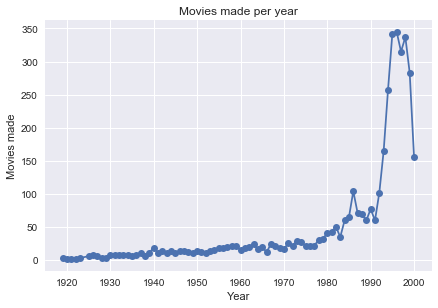

In [38]:
per_year = movies[["Year","Title"]].groupby(["Year"]).count()
per_year.reset_index(level=0, inplace=True)
plt.plot(per_year["Year"],per_year["Title"], 'o-')
plt.tight_layout()
plt.title("Movies made per year")
plt.xlabel("Year")
plt.ylabel("Movies made")
plt.show()

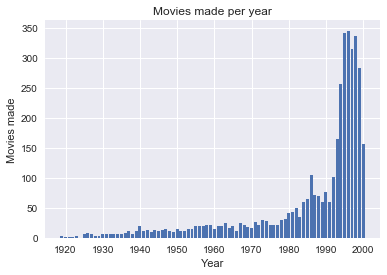

In [47]:
plt.bar(per_year["Year"], per_year["Title"])
plt.title("Movies made per year")
plt.xlabel("Year")
plt.ylabel("Movies made")
plt.show()

### PART B

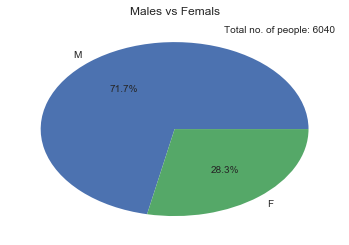

In [87]:
genders = users["Gender"].value_counts()
plt.pie(genders, labels = genders.index, autopct='%1.1f%%')
plt.title("Males vs Femals")
plt.text(1.2, 1.2,'Total no. of people: {}'.format(genders.sum()),
     horizontalalignment='right',
     verticalalignment='top')
plt.show()

### PART C

In [113]:
genres = pd.Series(np.concatenate(movies["Genre"].str.split("|")))
genres = genres.value_counts()

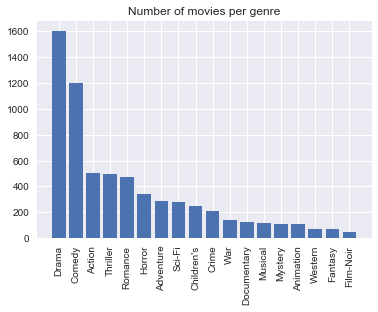

In [120]:
plt.bar(range(len(genres.index)), genres.values)
plt.xticks(range(len(genres.index)),genres.index ,rotation = 90)
plt.title("Number of movies per genre")
plt.show()

### PART D

In [164]:
#movies_and_ratings = pd.merge(movies,ratings, on = "Movie ID")
#dataset = pd.merge(movies_and_ratings[["User ID","Rating"]], users[["User ID", "Gender"]], on = "User ID")
#dataset.head()

dataset = pd.merge(ratings[["User ID", "Rating"]],users[["User ID", "Gender"]], on = "User ID")
dataset.head()

,User ID,Rating,Gender
0,1,5,F
1,1,3,F
2,1,3,F
3,1,4,F
4,1,5,F


In [173]:
datasetF = dataset[dataset["Gender"] == "F"]
datasetM = dataset[dataset["Gender"] == "M"]
print(len(datasetF["Rating"].values))
print(len(datasetM["Rating"].values))

246440
753769


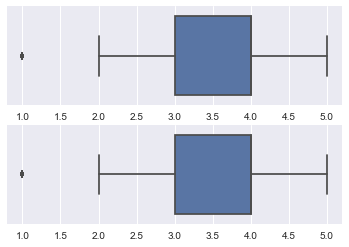

In [172]:
plt.subplot(2,1,1)
sns.boxplot(datasetF["Rating"].values)
plt.subplot(2,1,2)
sns.boxplot(datasetM["Rating"].values)

In [175]:
print(datasetF.describe())
print(datasetM.describe())

             User ID         Rating
count  246440.000000  246440.000000
mean     3130.437380       3.620366
std      1791.592052       1.111228
min         1.000000       1.000000
25%      1560.000000       3.000000
50%      3174.000000       4.000000
75%      4771.000000       4.000000
max      6039.000000       5.000000
             User ID         Rating
count  753769.000000  753769.000000
mean     2989.880830       3.568879
std      1705.824544       1.118724
min         2.000000       1.000000
25%      1501.000000       3.000000
50%      3032.000000       4.000000
75%      4403.000000       4.000000
max      6040.000000       5.000000


### PART E - to be completed

In [242]:
data3 = pd.merge(movies[["Movie ID","Genre"]], ratings[["Movie ID", "Rating"]], on = "Movie ID")
data3 = data3[["Genre","Rating"]]
data3.head()

,Genre,Rating
0,Animation|Children's|Comedy,5
1,Animation|Children's|Comedy,4
2,Animation|Children's|Comedy,4
3,Animation|Children's|Comedy,5
4,Animation|Children's|Comedy,5


In [243]:
s = data3['Genre'].str.split('|').apply(pd.Series, 1).stack()
s

0        0     Animation
         1    Children's
         2        Comedy
1        0     Animation
         1    Children's
         2        Comedy
2        0     Animation
         1    Children's
         2        Comedy
3        0     Animation
         1    Children's
         2        Comedy
4        0     Animation
         1    Children's
         2        Comedy
5        0     Animation
         1    Children's
         2        Comedy
6        0     Animation
         1    Children's
         2        Comedy
7        0     Animation
         1    Children's
         2        Comedy
8        0     Animation
         1    Children's
         2        Comedy
9        0     Animation
         1    Children's
         2        Comedy
                 ...    
1000194  0         Drama
         1      Thriller
1000195  0         Drama
         1      Thriller
1000196  0         Drama
         1      Thriller
1000197  0         Drama
         1      Thriller
1000198  0         Drama


In [244]:
s.index = s.index.droplevel(-1)

In [245]:
s.name = 'Genre'

In [246]:
del data3["Genre"]

In [ ]:
data3.join(s.apply(lambda x: pd.Series(x.split('|'))))

### PART F